In [1]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,HuberRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from patsy import dmatrix
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset/result_004.csv")

In [3]:
df.dropna(inplace=True)

In [4]:
df=df.drop(columns=['30','31','32','33','34','35'],axis=1)
df_mc=df[['36']]
df_mc.columns=['mc']


In [5]:
df=df.drop(columns=['36'])

In [6]:
df_1=df.copy()
df_1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-3.63,-2.38,-1.37,-3.50,-2.25,-1.37,-3.00,-2.63,0.50,0.75,...,1.63,2.00,-0.63,0.12,-1.25,-1.50,-0.12,-0.75,-1.88,0.12
1,-3.63,-1.50,-1.50,-3.63,-2.38,-1.37,-2.88,-2.50,0.50,0.75,...,1.75,2.13,-0.63,-0.25,-1.37,-1.50,0.00,-0.88,-1.63,0.00
2,-3.63,-2.50,-1.37,-3.50,-2.25,-1.50,-3.00,-2.63,0.50,0.63,...,1.75,1.88,-0.12,-0.12,-1.75,-0.88,0.00,-0.88,-1.12,-0.25
3,-3.50,-2.63,-1.37,-3.50,-2.25,-1.37,-3.13,-2.50,0.37,0.50,...,1.75,1.75,0.00,-0.37,-1.50,-0.88,0.00,-0.88,-1.50,-0.37
4,-3.63,-2.50,-1.50,-3.38,-2.13,-1.63,-3.13,-2.50,0.37,0.63,...,1.50,2.38,-0.12,-1.00,-1.00,-0.88,-0.12,-0.25,-1.63,-0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,-3.25,-2.75,-1.00,-3.25,-2.50,-1.37,-2.63,-2.13,0.25,0.37,...,0.63,1.50,-0.37,-0.37,-1.00,-1.37,0.00,-1.00,-1.50,0.37
5853,-3.25,-1.88,-1.12,-3.13,-2.38,-1.25,-2.75,-2.25,0.25,0.37,...,1.25,2.13,0.12,-0.63,-1.12,-1.00,-0.37,-0.50,-1.50,-0.50
5854,-3.25,-2.00,-1.00,-3.13,-2.50,-1.37,-2.50,-2.38,0.25,0.63,...,1.75,1.00,-0.37,-0.25,-1.37,-0.63,-0.37,-1.37,-1.25,-0.12
5855,-3.13,-1.63,-1.12,-3.13,-2.50,-1.50,-2.50,-2.38,0.12,0.50,...,1.37,1.37,-0.50,0.25,-1.75,-1.00,-0.25,-1.12,-1.00,0.00


In [7]:
for i in range(30):
    df['{}'.format(i)]= df['12']-df['{}'.format(i)]

for i in range(30):
    df_1['{}'.format(i)]= df['25']-df['{}'.format(i)]


In [8]:
df=df.drop(columns=['12'])
df_1=df_1.drop(columns=['25'])

In [9]:
df.columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29']
df

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
0,6.88,5.63,4.62,6.75,5.50,4.62,6.25,5.88,2.75,2.50,...,-1.63,-2.00,0.63,-0.12,1.25,1.50,0.12,0.75,1.88,-0.12
1,6.51,4.38,4.38,6.51,5.26,4.25,5.76,5.38,2.38,2.13,...,-1.75,-2.13,0.63,0.25,1.37,1.50,0.00,0.88,1.63,0.00
2,6.13,5.00,3.87,6.00,4.75,4.00,5.50,5.13,2.00,1.87,...,-1.75,-1.88,0.12,0.12,1.75,0.88,0.00,0.88,1.12,0.25
3,7.38,6.51,5.25,7.38,6.13,5.25,7.01,6.38,3.51,3.38,...,-1.75,-1.75,0.00,0.37,1.50,0.88,0.00,0.88,1.50,0.37
4,3.88,2.75,1.75,3.63,2.38,1.88,3.38,2.75,-0.12,-0.38,...,-1.50,-2.38,0.12,1.00,1.00,0.88,0.12,0.25,1.63,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,4.62,4.12,2.37,4.62,3.87,2.74,4.00,3.50,1.12,1.00,...,-0.63,-1.50,0.37,0.37,1.00,1.37,0.00,1.00,1.50,-0.37
5853,6.38,5.01,4.25,6.26,5.51,4.38,5.88,5.38,2.88,2.76,...,-1.25,-2.13,-0.12,0.63,1.12,1.00,0.37,0.50,1.50,0.50
5854,4.88,3.63,2.63,4.76,4.13,3.00,4.13,4.01,1.38,1.00,...,-1.75,-1.00,0.37,0.25,1.37,0.63,0.37,1.37,1.25,0.12
5855,5.76,4.26,3.75,5.76,5.13,4.13,5.13,5.01,2.51,2.13,...,-1.37,-1.37,0.50,-0.25,1.75,1.00,0.25,1.12,1.00,0.00


In [10]:
df_1.columns=['30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58']

In [11]:
df=pd.concat([df,df_1],axis=1)
df=pd.concat([df,df_mc],axis=1)
df

,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,mc
0,6.88,5.63,4.62,6.75,5.50,4.62,6.25,5.88,2.75,2.50,...,3.13,3.50,0.87,1.62,0.25,1.38,0.75,-0.38,1.62,1.087903
1,6.51,4.38,4.38,6.51,5.26,4.25,5.76,5.38,2.38,2.13,...,3.25,3.63,0.87,1.25,0.13,1.50,0.62,-0.13,1.50,1.064780
2,6.13,5.00,3.87,6.00,4.75,4.00,5.50,5.13,2.00,1.87,...,2.63,2.76,0.76,0.76,-0.87,0.88,0.00,-0.24,0.63,1.044257
3,7.38,6.51,5.25,7.38,6.13,5.25,7.01,6.38,3.51,3.38,...,2.63,2.63,0.88,0.51,-0.62,0.88,0.00,-0.62,0.51,1.025477
4,3.88,2.75,1.75,3.63,2.38,1.88,3.38,2.75,-0.12,-0.38,...,2.38,3.26,0.76,-0.12,-0.12,0.76,0.63,-0.75,0.25,1.009584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,4.62,4.12,2.37,4.62,3.87,2.74,4.00,3.50,1.12,1.00,...,2.00,2.87,1.00,1.00,0.37,1.37,0.37,-0.13,1.74,1.282344
5853,6.38,5.01,4.25,6.26,5.51,4.38,5.88,5.38,2.88,2.76,...,2.25,3.13,1.12,0.37,-0.12,0.63,0.50,-0.50,0.50,1.297385
5854,4.88,3.63,2.63,4.76,4.13,3.00,4.13,4.01,1.38,1.00,...,2.38,1.63,0.26,0.38,-0.74,0.26,-0.74,-0.62,0.51,1.309049
5855,5.76,4.26,3.75,5.76,5.13,4.13,5.13,5.01,2.51,2.13,...,2.37,2.37,0.50,1.25,-0.75,0.75,-0.12,0.00,1.00,1.315252


In [12]:
scaler=MinMaxScaler()
for i in range(1,59):
    scaler.fit(df[['{}'.format(i)]])
    df[['{}'.format(i)]]=scaler.transform(df[['{}'.format(i)]])

df

,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,mc
0,0.692497,0.672346,0.70250,0.70250,0.699068,0.692903,0.713561,0.715990,0.692497,0.660645,...,0.750,0.778107,0.649306,0.715655,0.684874,0.752,0.904943,0.617424,0.809886,1.087903
1,0.646986,0.508519,0.67250,0.67250,0.667111,0.645161,0.651458,0.656325,0.646986,0.612903,...,0.810,0.816568,0.649306,0.597444,0.634454,0.800,0.855513,0.712121,0.764259,1.064780
2,0.600246,0.589777,0.60875,0.60875,0.599201,0.612903,0.618504,0.626492,0.600246,0.579355,...,0.500,0.559172,0.611111,0.440895,0.214286,0.552,0.619772,0.670455,0.433460,1.044257
3,0.753998,0.787680,0.78125,0.78125,0.782956,0.774194,0.809886,0.775656,0.785978,0.774194,...,0.500,0.520710,0.652778,0.361022,0.319328,0.552,0.619772,0.526515,0.387833,1.025477
4,0.323493,0.294889,0.34375,0.31250,0.283622,0.339355,0.349810,0.342482,0.339483,0.289032,...,0.375,0.707101,0.611111,0.159744,0.529412,0.504,0.859316,0.477273,0.288973,1.009584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,0.414514,0.474443,0.42125,0.43625,0.482024,0.450323,0.428390,0.431981,0.492005,0.467097,...,0.185,0.591716,0.694444,0.517572,0.735294,0.748,0.760456,0.712121,0.855513,1.282344
5853,0.630996,0.591088,0.65625,0.64125,0.700399,0.661935,0.666667,0.656325,0.708487,0.694194,...,0.310,0.668639,0.736111,0.316294,0.529412,0.452,0.809886,0.571970,0.384030,1.297385
5854,0.446494,0.410223,0.45375,0.45375,0.516644,0.483871,0.444867,0.492840,0.523985,0.467097,...,0.375,0.224852,0.437500,0.319489,0.268908,0.304,0.338403,0.526515,0.387833,1.309049
5855,0.554736,0.492792,0.59375,0.57875,0.649800,0.629677,0.571610,0.612172,0.662977,0.612903,...,0.370,0.443787,0.520833,0.597444,0.264706,0.500,0.574144,0.761364,0.574144,1.315252


In [13]:
scaler.fit(df_mc)
df_mc=scaler.transform(df_mc)
df_mc

array([[0.74110539],
       [0.71625706],
       [0.69420191],
       ...,
       [0.97875915],
       [0.98542499],
       [0.98270173]])

## Dataset 12,28 to regression

In [236]:
data = df[['12','41','44']]
data

,12,41,44
0,0.517906,0.534435,0.281796
1,0.483471,0.550964,0.219451
2,0.482094,0.500000,0.124688
3,0.465565,0.516529,0.154613
4,0.206612,0.758953,0.032419
...,...,...,...
5853,0.964187,0.088154,0.812968
5854,0.534435,0.447658,0.780549
5855,0.636364,0.501377,0.905237
5856,0.757576,0.294766,0.812968


In [237]:
target=df_mc
target

,mc
0,1.087903
1,1.064780
2,1.044257
3,1.025477
4,1.009584
...,...
5853,1.297385
5854,1.309049
5855,1.315252
5856,1.312718


In [238]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3,shuffle=False , random_state=10)

In [239]:
x_train, X2_val, y_train, y_val = train_test_split(x_train, y_train,shuffle=False,test_size=0.3)

In [85]:
poly = PolynomialFeatures(degree=2,include_bias=False)
poly.fit(x_train)

x_train_poly=poly.transform(x_train)
poly.fit(x_test)
x_test_poly=poly.transform(x_test)

In [240]:
model_poly = linear_model.Ridge(alpha=0.9,tol=1e-10,solver='auto').fit(x_train,y_train)

In [241]:
pre=model_poly.predict(x_test)
pre

array([[0.93569398],
       [0.93169714],
       [0.93667342],
       ...,
       [0.9389156 ],
       [0.93526914],
       [0.93682706]])

In [117]:
scaler.fit(pre)
pre=scaler.transform(pre)

In [242]:
model_poly.score(x_test,y_test)

-0.0004922017288349068

In [243]:
ep_12=[]
for i in range(1,1700,1):
    RMSE=mean_squared_error(y_test[:i],pre[:i])**0.5
    ep_12.append(RMSE)

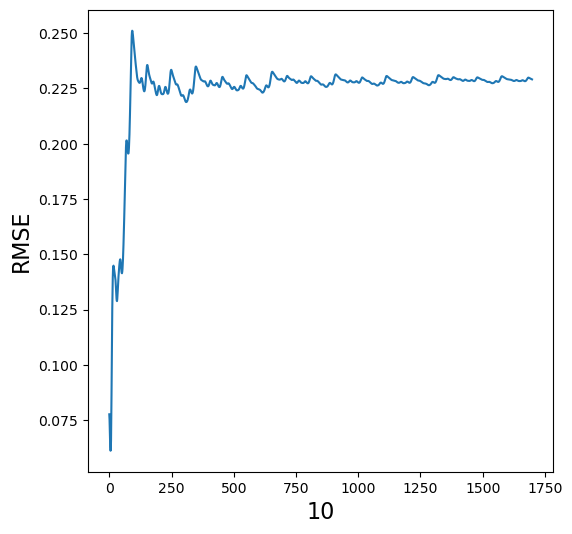

In [244]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(ep_12)
plt.xlabel("10",fontsize = 16)
plt.ylabel("RMSE",fontsize = 16)
plt.show()

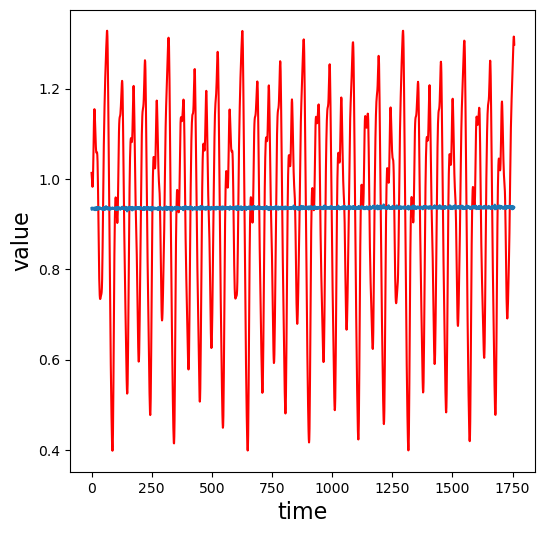

In [245]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(np.array(y_test),c='r')
plt.plot(pre)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

## 11-13, 26-29 Dataset

In [ ]:
data_pick=df[['11','12','13','26','27','28','29']]
data_pick

In [365]:
target_pick=df_mc.values
target_pick

array([[1.08790267],
       [1.06478027],
       [1.04425704],
       ...,
       [1.31525212],
       [1.31271801],
       [1.29760772]])

In [ ]:
x_train_pick, x_test_pick, y_train_pick, y_test_pick = train_test_split(data_pick, target_pick, test_size=0.3, shuffle=False, random_state=0)

In [ ]:
poly=PolynomialFeatures(degree=2,include_bias=False)
poly.fit(x_train_pick)
x_train_pick_poly=poly.transform(x_train)
x_test_pick_poly = poly.transform(x_test)

In [ ]:
model_pick_poly = linear_model.Ridge(alpha=0.6,tol=1e-5,solver='svd').fit(x_train,y_train)

In [ ]:
pre_pick_poly=model_pick_poly.predict(x_test)
pre_pick_poly

In [ ]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(y_test_pick,c='r')
plt.plot(pre_pick_poly)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

In [ ]:
model_pick_poly.score(x_test,y_test)

In [ ]:
pre_pick_poly=pd.DataFrame(pre_pick_poly,columns=['predict'])

In [ ]:
y_test_pd=pd.DataFrame(y_test,columns=['target'])
corr_pick_poly_pd=pd.concat([pre_pick_poly,y_test_pd],axis=1)

In [ ]:
corr_pick_poly_pd.corr()

In [ ]:
RMSE = mean_squared_error(y_test, pre_pick_poly)**0.5
RMSE

# except upper 30

In [61]:
data_upper = df.drop(columns=['mc'],axis=1)
data_upper

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
0,0.692497,0.672346,0.70250,0.70250,0.699068,0.692903,0.713561,0.715990,0.692497,0.660645,...,0.471963,0.750,0.778107,0.649306,0.715655,0.684874,0.752,0.904943,0.617424,0.809886
1,0.646986,0.508519,0.67250,0.67250,0.667111,0.645161,0.651458,0.656325,0.646986,0.612903,...,0.471963,0.810,0.816568,0.649306,0.597444,0.634454,0.800,0.855513,0.712121,0.764259
2,0.600246,0.589777,0.60875,0.60875,0.599201,0.612903,0.618504,0.626492,0.600246,0.579355,...,0.471963,0.500,0.559172,0.611111,0.440895,0.214286,0.552,0.619772,0.670455,0.433460
3,0.753998,0.787680,0.78125,0.78125,0.782956,0.774194,0.809886,0.775656,0.785978,0.774194,...,0.532710,0.500,0.520710,0.652778,0.361022,0.319328,0.552,0.619772,0.526515,0.387833
4,0.323493,0.294889,0.34375,0.31250,0.283622,0.339355,0.349810,0.342482,0.339483,0.289032,...,0.588785,0.375,0.707101,0.611111,0.159744,0.529412,0.504,0.859316,0.477273,0.288973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,0.414514,0.474443,0.42125,0.43625,0.482024,0.450323,0.428390,0.431981,0.492005,0.467097,...,0.700935,0.185,0.591716,0.694444,0.517572,0.735294,0.748,0.760456,0.712121,0.855513
5853,0.630996,0.591088,0.65625,0.64125,0.700399,0.661935,0.666667,0.656325,0.708487,0.694194,...,0.588785,0.310,0.668639,0.736111,0.316294,0.529412,0.452,0.809886,0.571970,0.384030
5854,0.446494,0.410223,0.45375,0.45375,0.516644,0.483871,0.444867,0.492840,0.523985,0.467097,...,0.649533,0.375,0.224852,0.437500,0.319489,0.268908,0.304,0.338403,0.526515,0.387833
5855,0.554736,0.492792,0.59375,0.57875,0.649800,0.629677,0.571610,0.612172,0.662977,0.612903,...,0.121495,0.370,0.443787,0.520833,0.597444,0.264706,0.500,0.574144,0.761364,0.574144


In [62]:
target_upper=df_mc
target_upper

array([[0.74110539],
       [0.71625706],
       [0.69420191],
       ...,
       [0.97875915],
       [0.98542499],
       [0.98270173]])

In [63]:
x_train_upper, x_test_upper, y_train_upper, y_test_upper = train_test_split(data_upper, target_upper, test_size=0.3, shuffle=False, random_state=None)

In [64]:
x_train_upper, X2_val, y_train_upper, y_val = train_test_split(x_train_upper, y_train_upper,shuffle=False,test_size=0.3)

In [28]:
poly=PolynomialFeatures(degree=4,include_bias=True)
poly.fit(x_train_upper)
x_train_pick_upper=poly.transform(x_train_upper)
x_test_pick_upper = poly.transform(x_test_upper)

MemoryError: Unable to allocate 7.67 GiB for an array with shape (1845, 557845) and data type float64

In [18]:
y_train_upper=np.array(y_train_upper).ravel()

In [19]:
parameters={'alpha':[1e-4],'tol':[1e-5],'max_iter':[1000]}

In [20]:
model_hub=HuberRegressor()
model_hub = GridSearchCV(model_hub, param_grid=parameters, cv=3, refit=True)
model_hub.fit(x_train_upper,y_train_upper.ravel())

GridSearchCV(cv=3, estimator=HuberRegressor(),
             param_grid={'alpha': [0.0001], 'max_iter': [1000], 'tol': [1e-05]})

In [21]:
scores_df = pd.DataFrame(model_hub.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'alpha': 0.0001, 'max_iter': 1000, 'tol': 1e-05}",-0.033129,1,-0.042663,-0.030687,-0.026037


In [22]:
parameters= {'alpha':[1e-3,1e-4,1e-5],'tol':[1e-3,1e-4,1e-5],'shuffle':[False],'epsilon':[1e-1,1e-2,1e-3]}

In [23]:
model_sgd=SGDRegressor()
model_sgd = GridSearchCV(model_sgd, param_grid=parameters, cv=3, refit=True)
model_sgd.fit(x_train_upper,y_train_upper.ravel())

GridSearchCV(cv=3, estimator=SGDRegressor(),
             param_grid={'alpha': [0.001, 0.0001, 1e-05],
                         'epsilon': [0.1, 0.01, 0.001], 'shuffle': [False],
                         'tol': [0.001, 0.0001, 1e-05]})

In [24]:
scores_df = pd.DataFrame(model_sgd.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'alpha': 0.001, 'epsilon': 0.1, 'shuffle': Fa...",-0.001347,25,-0.002077,0.001277,-0.003239
1,"{'alpha': 0.001, 'epsilon': 0.1, 'shuffle': Fa...",-0.001259,13,-0.001958,0.001321,-0.003139
2,"{'alpha': 0.001, 'epsilon': 0.1, 'shuffle': Fa...",-0.001259,13,-0.001958,0.001321,-0.003139
3,"{'alpha': 0.001, 'epsilon': 0.01, 'shuffle': F...",-0.001347,25,-0.002077,0.001277,-0.003239
4,"{'alpha': 0.001, 'epsilon': 0.01, 'shuffle': F...",-0.001259,13,-0.001958,0.001321,-0.003139
5,"{'alpha': 0.001, 'epsilon': 0.01, 'shuffle': F...",-0.001259,13,-0.001958,0.001321,-0.003139
6,"{'alpha': 0.001, 'epsilon': 0.001, 'shuffle': ...",-0.001347,25,-0.002077,0.001277,-0.003239
7,"{'alpha': 0.001, 'epsilon': 0.001, 'shuffle': ...",-0.001259,13,-0.001958,0.001321,-0.003139
8,"{'alpha': 0.001, 'epsilon': 0.001, 'shuffle': ...",-0.001259,13,-0.001958,0.001321,-0.003139
9,"{'alpha': 0.0001, 'epsilon': 0.1, 'shuffle': F...",-0.001344,22,-0.002071,0.001269,-0.003229


In [25]:
parameters={'kernel':['linear','poly','rbf'],'gamma':['auto','scale'],'tol':[1e-3,1e-4,1e-10]}

In [26]:
model_svr=SVR()
model_svr = GridSearchCV(model_svr, param_grid=parameters, cv=3, refit=True)
model_svr.fit(x_train_upper,y_train_upper.ravel())

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'tol': [0.001, 0.0001, 1e-10]})

In [27]:
scores_df = pd.DataFrame(model_svr.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'gamma': 'auto', 'kernel': 'linear', 'tol': 0...",-0.045096,11,-0.041595,-0.045028,-0.048664
1,"{'gamma': 'auto', 'kernel': 'linear', 'tol': 0...",-0.044976,9,-0.041673,-0.045081,-0.048175
2,"{'gamma': 'auto', 'kernel': 'linear', 'tol': 1...",-0.044947,7,-0.041641,-0.045044,-0.048155
3,"{'gamma': 'auto', 'kernel': 'poly', 'tol': 0.001}",-0.024974,3,-0.032246,-0.023970,-0.018705
4,"{'gamma': 'auto', 'kernel': 'poly', 'tol': 0.0...",-0.024949,2,-0.032254,-0.023896,-0.018697
5,"{'gamma': 'auto', 'kernel': 'poly', 'tol': 1e-10}",-0.024938,1,-0.032247,-0.023888,-0.018679
6,"{'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.001}",-0.029760,6,-0.034889,-0.028169,-0.026220
7,"{'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.0001}",-0.029745,5,-0.034698,-0.028216,-0.026322
8,"{'gamma': 'auto', 'kernel': 'rbf', 'tol': 1e-10}",-0.029745,4,-0.034694,-0.028215,-0.026326
9,"{'gamma': 'scale', 'kernel': 'linear', 'tol': ...",-0.045096,11,-0.041595,-0.045028,-0.048664


In [28]:
parameters={'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'tol':[1e-7,1e-8,1e-9,1e-10],'solver':['auto','svd']}

In [29]:
model_upper=linear_model.Ridge()
model_upper = GridSearchCV(model_upper, param_grid=parameters,  refit=True)
model_upper.fit(x_train_upper,y_train_upper.ravel())

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'solver': ['auto', 'svd'],
                         'tol': [1e-07, 1e-08, 1e-09, 1e-10]})

In [30]:
scores_df = pd.DataFrame(model_upper.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'alpha': 0.1, 'solver': 'auto', 'tol': 1e-07}",-0.008712,69,-0.003218,-0.009812,-0.013114
1,"{'alpha': 0.1, 'solver': 'auto', 'tol': 1e-08}",-0.008712,69,-0.003218,-0.009812,-0.013114
2,"{'alpha': 0.1, 'solver': 'auto', 'tol': 1e-09}",-0.008712,69,-0.003218,-0.009812,-0.013114
3,"{'alpha': 0.1, 'solver': 'auto', 'tol': 1e-10}",-0.008712,69,-0.003218,-0.009812,-0.013114
4,"{'alpha': 0.1, 'solver': 'svd', 'tol': 1e-07}",-0.008712,65,-0.003218,-0.009812,-0.013114
...,...,...,...,...,...,...
67,"{'alpha': 0.9, 'solver': 'auto', 'tol': 1e-10}",-0.005708,1,-0.002275,-0.007508,-0.008655
68,"{'alpha': 0.9, 'solver': 'svd', 'tol': 1e-07}",-0.005708,5,-0.002275,-0.007508,-0.008655
69,"{'alpha': 0.9, 'solver': 'svd', 'tol': 1e-08}",-0.005708,5,-0.002275,-0.007508,-0.008655
70,"{'alpha': 0.9, 'solver': 'svd', 'tol': 1e-09}",-0.005708,5,-0.002275,-0.007508,-0.008655


In [31]:
parameters={'alpha':[1e-2,4e-3,1e-4,3e-4,1e-5]}

In [32]:
model_gpr=GaussianProcessRegressor()
model_gpr = GridSearchCV(model_gpr, param_grid=parameters,  refit=True)
model_gpr.fit(x_train_upper,y_train_upper.ravel())

GridSearchCV(estimator=GaussianProcessRegressor(),
             param_grid={'alpha': [0.01, 0.004, 0.0001, 0.0003, 1e-05]})

In [33]:
scores_df = pd.DataFrame(model_gpr.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,{'alpha': 0.01},-0.262729,1,-0.407885,-0.202940,-0.184771
1,{'alpha': 0.004},-0.421606,2,-0.641689,-0.335708,-0.303637
2,{'alpha': 0.0001},-1.803054,4,-2.962890,-1.467474,-1.216639
3,{'alpha': 0.0003},-1.357171,3,-2.141661,-1.121593,-0.939647
4,{'alpha': 1e-05},-2.202133,5,-3.755478,-1.763415,-1.457252


In [34]:
model_gpr=GaussianProcessRegressor(alpha=0.1).fit(x_train_upper,y_train_upper)
per_upper_gpr = model_gpr.predict(x_test_upper)
per_upper_gpr.reshape(-1,1)

array([[0.84925813],
       [0.69484392],
       [0.70601959],
       ...,
       [0.44942795],
       [0.58786006],
       [0.48847249]])

In [74]:
model_gpr.score(x_test_upper,y_test_upper)

-0.13593722324762725

## linear regression learning

In [35]:
model_linear=LinearRegression(fit_intercept=True).fit(x_train_upper,y_train_upper)

In [47]:
per_upper_li = model_upper.predict(x_test_upper)
per_upper_li.reshape(-1,1)
per_upper_li=pd.DataFrame(per_upper_li)

In [48]:
scaler.fit(per_upper_li)
per_upper_li=scaler.transform(per_upper_li)
per_upper_li

array([[0.60265541],
       [0.6244795 ],
       [0.39109086],
       ...,
       [0.70264992],
       [0.43594459],
       [0.3975115 ]])

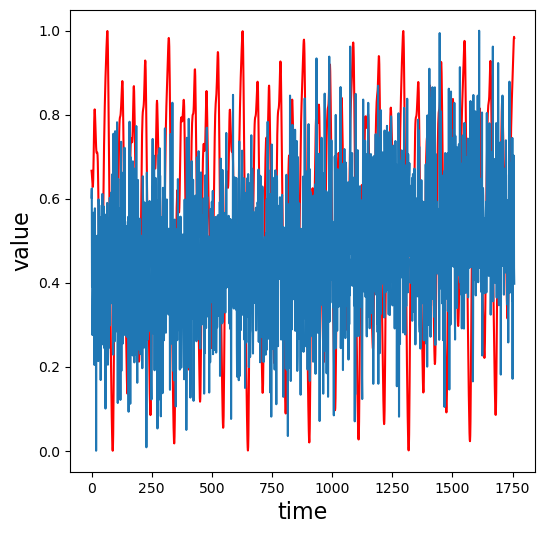

In [49]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(np.array(y_test_upper),c='r')
plt.plot(per_upper_li)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

In [50]:
ep_li=[]
for i in range(1,1750,1):
    RMSE=mean_squared_error(y_test_upper[:i],per_upper_li[:i])**0.5
    ep_li.append(RMSE)

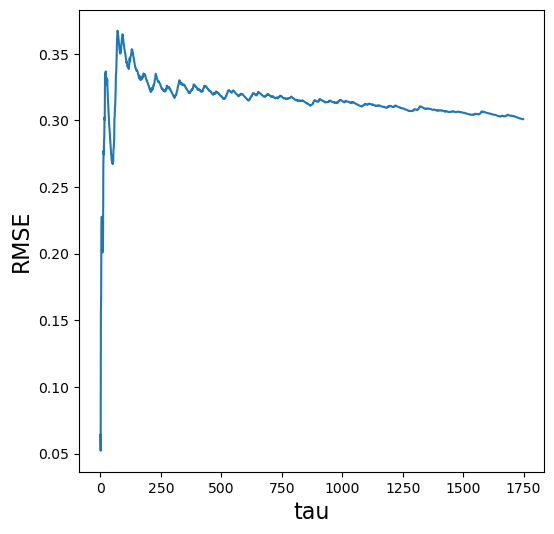

In [51]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(ep_li)
plt.xlabel("tau",fontsize = 16)
plt.ylabel("RMSE",fontsize = 16)

plt.show()

In [52]:
RMSE_li = mean_squared_error(y_test_upper, per_upper_li)**0.5
RMSE_li

0.3019855290913474

In [55]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 13.9 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107728 sha256=8b0737e62236b149c518e6dd9207c7f38893c95be41013a989e7f22ec9ca6776
  Stored in directory: /home/ec2-user/.cache/pip/wheels/79/6c/4b/13ea3238d017bc19711b4312359e2c95be91a1a9d60d949572
Successfully built eli5


In [56]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel

In [57]:
perm = PermutationImportance(model_linear).fit(x_train_upper, y_train_upper)
eli5.explain_weights_df(perm)

,feature,weight,std
0,x29,2.324058e+25,2.142130e+23
1,x0,2.039026e+25,3.310371e+23
2,x47,4.237422e+22,7.077510e+20
3,x55,3.246630e+22,2.156817e+20
4,x57,2.637414e+22,4.669320e+20
5,x41,2.378115e+22,2.584242e+20
6,x24,2.278971e+22,4.239972e+20
7,x48,1.331519e+22,1.674259e+20
8,x17,1.213556e+22,1.165678e+20
9,x18,1.208074e+22,1.400478e+20


## ridge model learning

In [65]:
model_upper=linear_model.Ridge(alpha=0.9, tol=1e-12,solver='auto').fit(x_train_upper,y_train_upper)
per_upper_rid = model_upper.predict(x_test_upper)
per_upper_rid.reshape(-1,1)

array([[0.60112396],
       [0.60330366],
       [0.57999378],
       ...,
       [0.61111099],
       [0.58447358],
       [0.58063504]])

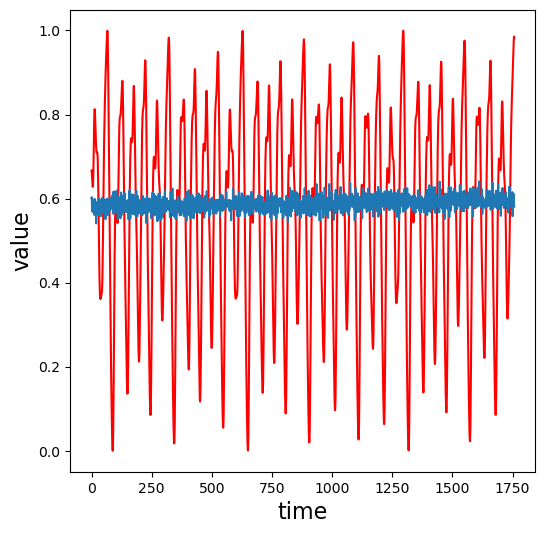

In [66]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(np.array(y_test_upper),c='r')
plt.plot(per_upper_rid)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

In [67]:
per_upper_rid

array([[0.60112396],
       [0.60330366],
       [0.57999378],
       ...,
       [0.61111099],
       [0.58447358],
       [0.58063504]])

In [68]:
scaler.fit(per_upper_rid)
per_upper_rid=scaler.transform(per_upper_rid)
per_upper_rid

array([[0.60265541],
       [0.6244795 ],
       [0.39109086],
       ...,
       [0.70264992],
       [0.43594459],
       [0.3975115 ]])

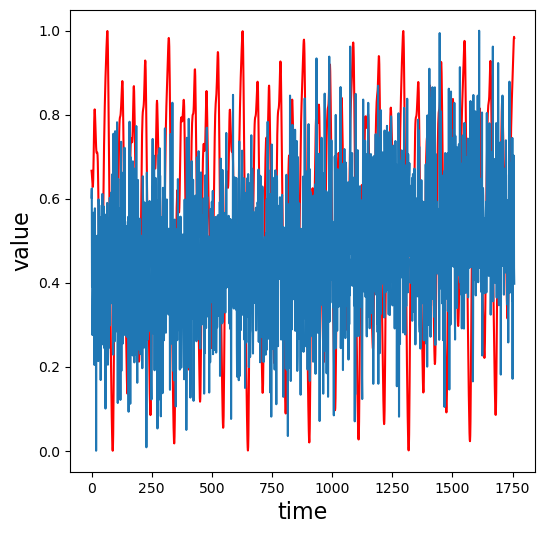

In [69]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(np.array(y_test_upper),c='r')
plt.plot(per_upper_rid)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

In [70]:
model_upper.score(x_test_upper,y_test_upper)

-0.0035084429430236597

In [71]:
y_test_upper

array([[0.66658223],
       [0.66108617],
       [0.65188594],
       ...,
       [0.97875915],
       [0.98542499],
       [0.98270173]])

In [72]:
ep=[]
for i in range(1,1750,1):
    RMSE=mean_squared_error(y_test_upper[:i],per_upper_rid[:i])**0.5
    ep.append(RMSE)

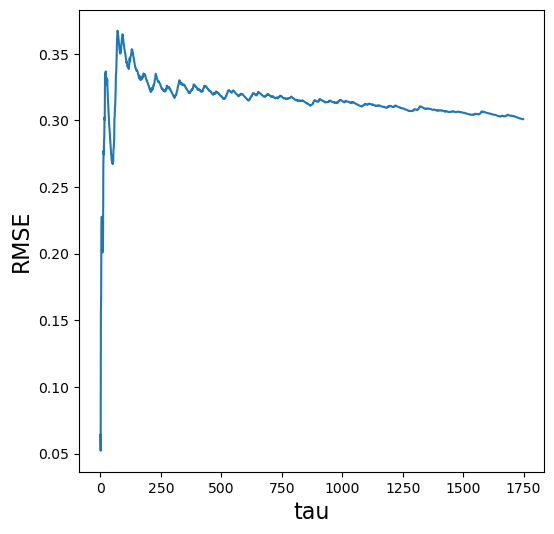

In [73]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(ep)
plt.xlabel("tau",fontsize = 16)
plt.ylabel("RMSE",fontsize = 16)

plt.show()

In [74]:
per_upper_pd=pd.DataFrame(per_upper_rid,columns=['predict'])
per_upper_pd

,predict
0,0.602655
1,0.624480
2,0.391091
3,0.445430
4,0.275360
...,...
1753,0.479234
1754,0.680038
1755,0.702650
1756,0.435945


In [75]:
y_test_upper=y_test_upper
y_test_upper_pd=pd.DataFrame(y_test_upper,columns=['target'])
corr_pick_upper_pd=pd.concat([per_upper_pd,y_test_upper_pd],axis=1)
corr_pick_upper_pd

,predict,target
0,0.602655,0.666582
1,0.624480,0.661086
2,0.391091,0.651886
3,0.445430,0.641309
4,0.275360,0.632215
...,...,...
1753,0.479234,0.950061
1754,0.680038,0.966224
1755,0.702650,0.978759
1756,0.435945,0.985425


In [76]:
corr_pick_upper_pd.corr()

,predict,target
predict,1.000000,0.034198
target,0.034198,1.000000


In [77]:
RMSE = mean_squared_error(y_test_upper, per_upper_rid)**0.5
RMSE

0.3019855290913474

In [78]:
perm = PermutationImportance(model_upper).fit(x_train_upper, y_train_upper)
eli5.explain_weights_df(perm)

,feature,weight,std
0,x10,0.011867,0.000843
1,x39,0.010420,0.002545
2,x31,0.007441,0.001602
3,x2,0.006391,0.000764
4,x11,0.002445,0.000468
5,x7,0.001976,0.000626
6,x17,0.001974,0.001070
7,x50,0.001811,0.001072
8,x20,0.001794,0.000702
9,x16,0.001684,0.001031


##  svr regressor

In [89]:
model_svr=SVR(tol=0.001).fit(x_train_upper,y_train_upper.ravel())
per_svr = model_svr.predict(x_test_upper)
per_svr.reshape(-1,1)
per_svr=pd.DataFrame(per_svr)

In [84]:
model_svr.score(x_test_upper,y_test_upper)

-0.26430500847387317

In [90]:
scaler.fit(per_svr)
per_svr=scaler.transform(per_svr)
per_svr

array([[0.8005465 ],
       [0.48169936],
       [0.69756501],
       ...,
       [0.39414499],
       [0.37406291],
       [0.33882812]])

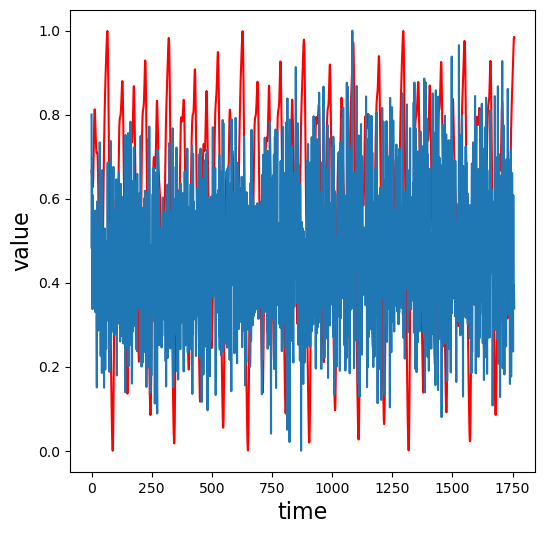

In [91]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(np.array(y_test_upper),c='r')
plt.plot(per_svr)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

In [99]:
ep_svr=[]
for i in range(1,1750,1):
    RMSE=mean_squared_error(y_test_upper[:i],per_svr[:i])**0.5
    ep_svr.append(RMSE)

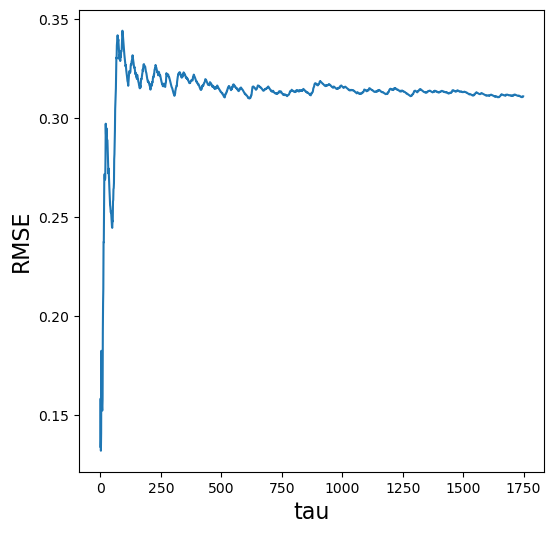

In [100]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(ep_svr)
plt.xlabel("tau",fontsize = 16)
plt.ylabel("RMSE",fontsize = 16)

plt.show()

In [101]:
RMSE = mean_squared_error(y_test_upper, per_svr)**0.5
RMSE

0.31254406920784605